CS249 -- Spring 2017 -- D.S. Parker &copy; 2017

# Some first steps with R, using key datatypes for data science

In [187]:
#  set the dimensions of plots for this notebook, in inches
options( repr.plot.width=5, repr.plot.height=5 )

# A Challenge:

<p style="color:red;">
<b>
Notice that, when the "Auto" dataset is displayed with a pairs plot,
all plots involving MPG are "curved", rather than linear.
The curves appear to reflect a nonlinear relationship between the other variables and MPG.
<br/>
<br/>
Find a function <i>f</i> such that,
when MPG is replaced by <i>f</i>(MPG), the curves are replaced by plots that look linear.
</b>
<br/>
<br/>
Color each point with a color reflecting its MPG value
(such as red for low MPG, blue for medium, and green for high MPG).
<br/>
<br/>
If you can do this, you are ready to move into the next lecture, and more advanced things.
You can skip this lecture.
<br/>
<br/>
Hint:  MPG is a measure of gasoline savings.
Displacement, Weight, and Horsepower are measures of gasoline use.
</p>

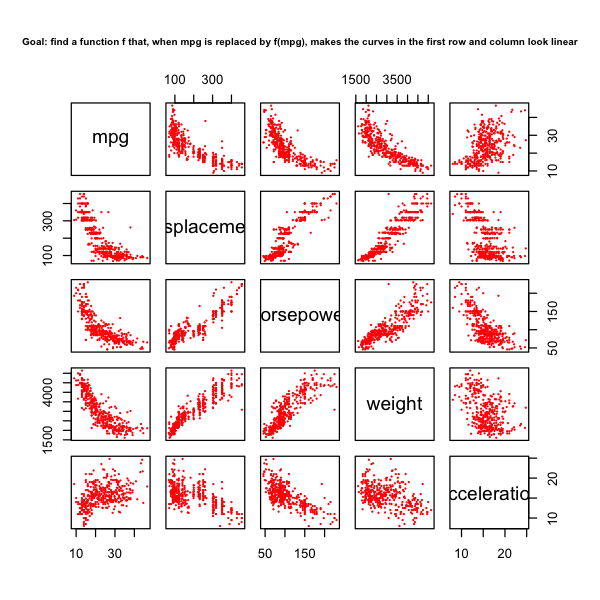

In [211]:
data(Auto)

pairs( Auto[,c(1,3,4,5,6),],
       main="Goal: find a function f that, when mpg is replaced by f(mpg), makes the curves in the first row and column look linear",
       pch=20, cex=0.25, cex.main=0.5, col="red",)

## The Big Picture
### What is R good for?

In [92]:
# R is great for exploring data -- with its central data structure:  the data frame

library(ISLR)
data(Auto)
head(Auto)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


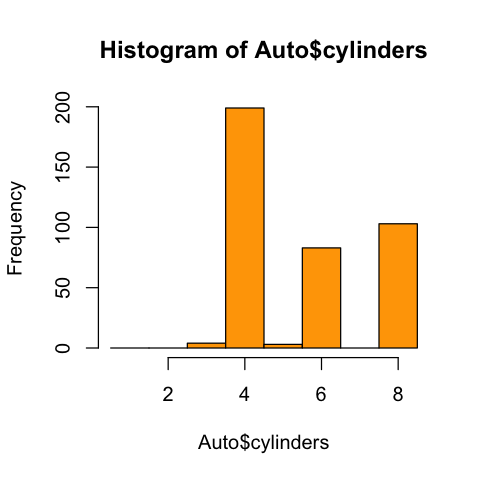

In [93]:
#  One reason for R's success is that it permits powerful interactive data display

hist( Auto$cylinders, col="orange", breaks=seq(0.5,8.5,by=1))

In [94]:
# Data manipulation, like slicing and dicing, is easy when you get used to it:

subset( Auto, cylinders==5 )

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
275,20.3,5,131,103,2830,15.9,78,2,audi 5000
298,25.4,5,183,77,3530,20.1,79,2,mercedes benz 300d
328,36.4,5,121,67,2950,19.9,80,2,audi 5000s (diesel)


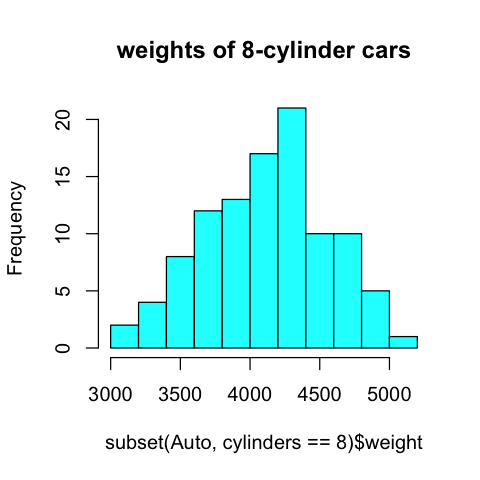

In [95]:
hist( subset( Auto, cylinders==8 )$weight, col="cyan", main="weights of 8-cylinder cars" )

In [116]:
### R has a wonderful system for obtaining and installing packages over the web

if ("ISLR" %in% installed.packages()) print("yay -- we have ISLR installed")

[1] "yay -- we have ISLR installed"


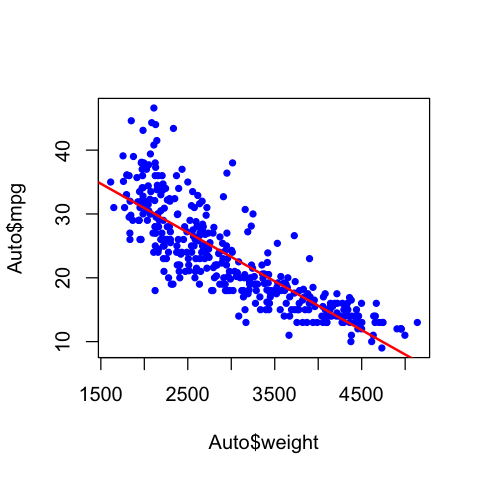

In [118]:
###  R also has developed a powerful paradigm for building models
###  Trevor Hastie, one of the authors of ESL and ISL, helped develop this in the 1990s.

my_model = lm( mpg ~ weight, data = Auto )   # construct a linear model through the data

plot( Auto$weight, Auto$mpg, pch=20, col="blue")  # plot the data

abline( my_model, col="red", lwd=2)  # add the model just created


### An inspired work that led to the development of R

The groundbreaking 1977 book by the eminent statistician
<a href="https://en.wikipedia.org/wiki/John_Tukey">John Tukey</a>
titled
<a href="https://en.wikipedia.org/wiki/Exploratory_data_analysis">Exploratory Data Analysis</a>
advocated development of intuition about data through information display.


### What is R not so good for?

In [119]:
# The syntax of the language can be surreal, and semantics too

x1 <- 1:3
x2 = seq(1,3,by=1)
assign("x3", c(1,2,3))
x4 = (1:100)[1:20][1:4][1:3]
x5 = cumsum(rep(0,3) + 1)

cbind(x1, x2, x3, x4, x5)
#  bind x1, x2, x3, x4 together as columns in a table

x1,x2,x3,x4,x5
1,1,1,1,1
2,2,2,2,2
3,3,3,3,3


In [49]:
# R is an interpreted language, and often -- without some ingenuity -- therefore slow.
# On large datasets, it is often a good idea to work on a sample rather than the whole thing.

my_random_sample = sample(1:nrow(Auto), 100)  # pick a random subset of 100 rows of the data
my_random_sample

summary( Auto[my_random_sample, 1:5] )


[1] 199 183  20 271 267  84  60 213 332 381  49 301 188 224 234 387 376 201
 [19] 375 265 388 315 260 362 122 256  92  66 359  65 262 222 127 200 274 240
 [37] 341 184 305 297 276 193 391  99 382 163 172 167 337 300  46  24 353  13
 [55] 366 214   5 334  38 292 160   8 312 221 389 392 370  16 275 177 103 247
 [73] 304 346 377 207  27 374 126 282 298 257   2 136 156  91 299  40 107 179
 [91] 248  41  23   4 354  62 348 153 140 308

      mpg          cylinders     displacement     horsepower         weight    
 Min.   :10.00   Min.   :3.00   Min.   : 70.0   Min.   : 46.00   Min.   :1800  
 1st Qu.:17.00   1st Qu.:4.00   1st Qu.:119.0   1st Qu.: 82.75   1st Qu.:2400  
 Median :22.45   Median :6.00   Median :168.0   Median : 96.00   Median :2945  
 Mean   :23.10   Mean   :5.57   Mean   :201.6   Mean   :104.85   Mean   :3042  
 3rd Qu.:28.00   3rd Qu.:8.00   3rd Qu.:260.0   3rd Qu.:121.25   3rd Qu.:3534  
 Max.   :44.00   Max.   :8.00   Max.   :440.0   Max.   :215.00   Max.   :4997  

In [100]:
# R can be made into a heavy-duty engineering tool, but wasn't designed for that.
#  In many situations standard functions break;  they weren't intended to handle errors.

x = c(1,1,1)
cor( x, x )   #  correlation matrix

Warning message in cor(x, x):
"the standard deviation is zero"

[1] NA

## Objects:  Sequences, Matrices, and Data Frames

### Sequences

In [56]:
c(1,2,3)   #  how did they come up with "c" ???   concatenation

1:3

seq(1,3, by=1)

seq(1,3, length.out=3)

cumsum( rep(1,3) )  #  rep( value, n )   generates a sequence of n copies of value

[1] 1 2 3

[1] 1 2 3

[1] 1 2 3

[1] 1 2 3

[1] 1 2 3

In [57]:
x = 1:3

length(x)

x[1]

x[1:2]  #  slice containing subscripts 1 and 2

x[2:3]  #  slice containing subscripts 2 and 3

x[]

[1] 3

[1] 1

[1] 1 2

[1] 2 3

[1] 1 2 3

In [59]:
x = 1:3
x

y = c(x, x)
y

z = c(x, y, y)
z

[1] 1 2 3

[1] 1 2 3 1 2 3

[1] 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3

In [62]:
x = 1:3

cbind( x, x )

rbind( x, x )

rbind( rbind(x,x), rbind(x,x) )

cbind( rbind(x,x), rbind(x,x) )

x,x
1,1
2,2
3,3


x,1,2,3
x,1,2,3


x,1,2,3
x,1,2,3
x,1,2,3
x,1,2,3


x,1,2,3,1,2,3
x,1,2,3,1,2,3


### Matrices

In [64]:
matrix( 0, nr=2, nc=3 )

matrix( 0, 2, 3 )

t( matrix( 0, 2, 3 ) )  # matrix transpose

0,0,0
0,0,0


0,0,0
0,0,0


0,0
0,0
0,0


In [68]:
dimensions = dim( matrix(0, nr=2, nc=3) )

dimensions

dimensions[1]
dimensions[2]

[1] 2 3

[1] 2

[1] 3

In [65]:
matrix( 1:6, nr=2, nc=3 )

matrix( 1:6, nr=2, nc=3, byrow=TRUE )  # insert elements 1:6 in row-major order

t( matrix( 1:6, nr=3, nc=2 ) )  #  using transpose to implement row-major order

1,3,5
2,4,6


1,2,3
4,5,6


1,2,3
4,5,6


In [67]:

A = matrix( 1:6,  nr=2, nc=3 )
B = matrix( 7:12, nr=3, nc=2 )

A + t(B)  #  matrix sum

A %*% B   #  matrix product

det( A %*% B )  #  determinant

solve( A %*% B )  #  matrix inverse

8,11,14
12,15,18


76,103
100,136


[1] 36

3.777778,-2.861111
-2.777778,2.111111


## Data Frames

In [85]:
data(Auto)

dim(Auto)

colnames(Auto)

rownames(Auto)[30:35]


[1] 392   9

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
[6] "acceleration" "year"         "origin"       "name"

[1] "30" "31" "32" "34" "35" "36"

In [87]:
Auto[ 1:5, 1:3 ]   #  data frames can be treated like arrays

mpg,cylinders,displacement
18,8,307
15,8,350
18,8,318
16,8,304
17,8,302


In [78]:
str(Auto)  #  inspect the "structure" of the data frame

'data.frame':	392 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : num  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : num  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...


In [79]:
#  Add a column to the Auto data.frame:

Auto$inefficiency = 1 / Auto$mpg

colnames(Auto)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
 [6] "acceleration" "year"         "origin"       "name"         "inefficiency"

In [88]:
# constructing a data frame from scratch

My_Data_Frame = data.frame( mpg = Auto$mpg, gpm = 1/Auto$mpg, cyl = Auto$cylinders )

dim(My_Data_Frame)

[1] 392   3

### A few other quirky but useful things

In [19]:
?attach  # for some reason the [ISLR] book likes this function

In [90]:
attach(Auto)  #  include the "namespace" of the Auto table into the R workspace

length(mpg)   #  now "mpg" is a variable in our workspace

unique(mpg)   #  show all distinct values in the mpg column


The following objects are masked from Auto (pos = 3):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year



[1] 392

[1] 18.0 15.0 16.0 17.0 14.0 24.0 22.0 21.0 27.0 26.0 25.0 10.0 11.0  9.0 28.0
 [16] 19.0 12.0 13.0 23.0 30.0 31.0 35.0 20.0 29.0 32.0 33.0 17.5 15.5 14.5 22.5
 [31] 24.5 18.5 29.5 26.5 16.5 31.5 36.0 25.5 33.5 20.5 30.5 21.5 43.1 36.1 32.8
 [46] 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7 27.5 27.2 30.9 21.1
 [61] 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2 16.9 31.9 34.1 35.7 27.4
 [76] 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5 38.1 32.1 37.2 26.4 24.3 19.1
 [91] 34.3 29.8 31.3 37.0 32.2 46.6 27.9 40.8 44.3 43.4 36.4 44.6 33.8 32.7 23.7
[106] 32.4 26.6 25.8 23.5 39.1 39.0 35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6
[121] 28.1 30.7 24.2 22.4 34.0 38.0 44.0

In [91]:
detach(Auto)  #  okay, that was fun; now remove the namespace

In [ ]:
#  Useful:
#  write.table(  Auto, file = "myfile.csv", sep=",", echo=FALSE, row.names=FALSE )  # write out a .csv file

In [105]:
apply( Auto[, 1:4], 2, mean )  # find the means of the first 4 columns of Auto

mpg    cylinders displacement   horsepower 
   23.445918     5.471939   194.411990   104.469388

In [106]:
apply( Auto[, 1:4], 2, sd )   # compute standard deviations of the first 4 columns of Auto

mpg    cylinders displacement   horsepower 
    7.805007     1.705783   104.644004    38.491160

In [109]:
apply( Auto[,1:4], 2, var )   # compute the variance of each of the first 4 columns of Auto

mpg    cylinders displacement   horsepower 
   60.918142     2.909696 10950.367554  1481.569393

In [112]:
max( is.na(Auto[,1:4] ) )  # determine if any element in the first 4 columns of Auto is NA

[1] 0

In [115]:
sum( Auto[,1:4] == 4 )   # determine how many times the value 4 occurs in the first 4 columns of Auto

[1] 199

# A Solution to the "Auto pairs plot" Challenge

A way of displaying columns 1,3,4,5,6 of the Auto data that replaces the curved plots by ones that appear linear.

In [180]:
color_intervals = cut( Auto$mpg, breaks=3 )   #  cut the range of MPG values into 3 intervals
color_codes = unclass(color_intervals)        #  turn the symbolic interval names into integers
colors = c("red","green","blue")[color_codes] #  use the integers as subscripts for RGB colors

colors[1:10]

[1] "red" "red" "red" "red" "red" "red" "red" "red" "red" "red"

In [181]:
#  set the dimensions of plots for this notebook, in inches
options( repr.plot.width=6, repr.plot.height=6 )

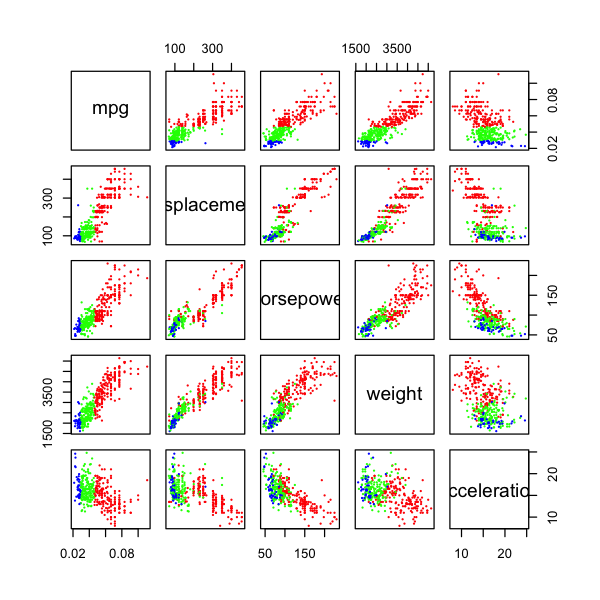

In [202]:
f = function(x) 1/x      #  using f(x) = 1/x  makes the Auto dataset look linear!

TransformedAuto = Auto[, c(1,3:6)]
TransformedAuto$mpg = f(Auto$mpg)

pairs( TransformedAuto, col=colors, pch=20, cex=0.25 )
